In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import itertools
from tqdm import tqdm, trange

In [2]:
def readlines(n, quiet=True, dtype=None):
    try:
        with open(f'{n}.txt', 'r') as f:
            data = [x.strip() for x in f.readlines()]
            data = list(filter(bool, data))
            if not quiet: print(len(data), 'lines read')
            
            if dtype:
                return np.array(data, dtype=dtype)
            else:
                return data
    except FileNotFoundError:
        open(f'{n}.txt', 'w').close()
        print(f'Created {n}.txt')

In [82]:
# 1
src = readlines(1, dtype=int)
test = np.array([199,200,208,210,200,207,240,269,260,263], dtype=int)

def sol1_1(src):
    ds = np.diff(src)
    return ds[ds > 0].shape[0]

# print(sol1_1(test))
print('*', sol1_1(src))

def sol1_2(src):
    p1 = np.roll(src, 1)
    p2 = np.roll(src, 2)
    windowed = (src + p1 + p2)[2:]
    return(sol1_1(windowed))
    
# print(sol1_2(test))
print('*', sol1_2(src))

# plt.figure(figsize=(20,5))
# plt.plot(src)
# plt.show()

* 1316
* 1344


In [83]:
# 2
src = readlines(2)
test = '''forward 5
down 5
forward 8
up 3
down 8
forward 2'''
test = [x.strip() for x in test.split('\n')]

def sol2_1(s):
    x = y = 0
    for line in s:
        if 'forward' in line: x += int(line.split()[1])
        if 'up' in line: y -= int(line.split()[1])
        if 'down' in line: y += int(line.split()[1])
#         print(x,y)
    return x*y

# print(sol2_1(test))
print('*', sol2_1(src))

def sol2_2(s):
    aim = x = y = 0
    for line in s:
        if 'forward' in line: 
            d = int(line.split()[1])
            x += d
            y += aim * d
        if 'up' in line: aim -= int(line.split()[1])
        if 'down' in line: aim += int(line.split()[1])
#         print(x,y)
    return x*y

# print(sol2_2(test))
print('*', sol2_2(src))

* 1714680
* 1963088820


In [84]:
# 3
src = readlines(3)
test = ['00100','11110','10110','10111','10101','01111','00111','11100','10000','11001','00010','01010']

def most_common(lst):
    return max(set(lst), key=lst.count)

def least_common(lst):
    return min(set(lst), key=lst.count)

def sol3_1(src):
    num_len = len(src[0])
    gamma = int(''.join(most_common(y) for y in [[x[i] for x in src] for i in range(num_len)]), 2)
    epsilon = int(''.join(least_common(y) for y in [[x[i] for x in src] for i in range(num_len)]), 2)
    return(gamma * epsilon)

# print(sol3_1(test))
print('*', sol3_1(src))

def sol3_2(s):
    num_len = len(src[0])

    lists = [[], ] * (num_len + 1)
    lists[0] = src
    for i in range(num_len):
        bits_in_ith_place = [x[i] for x in lists[i]]
        mc_bit = most_common(bits_in_ith_place)

        if bits_in_ith_place.count(mc_bit) != len(lists[i]):
            indices = [i for i, x in enumerate(bits_in_ith_place) if x == mc_bit]
        else:
            indices = [i for i, x in enumerate(bits_in_ith_place) if x == '1']

        lists[i+1] = [x for i,x in enumerate(lists[i])  if i in indices ]
        if len(lists[i+1]) == 1:
            break
    oxygen = lists[i+1][0]


    lists = [[], ] * (num_len + 1)
    lists[0] = src
    for i in range(num_len):
        bits_in_ith_place = [x[i] for x in lists[i]]
        mc_bit = least_common(bits_in_ith_place)

        if 2 * bits_in_ith_place.count(mc_bit) != len(lists[i]):
            indices = [i for i, x in enumerate(bits_in_ith_place) if x == mc_bit]
        else:
            indices = [i for i, x in enumerate(bits_in_ith_place) if x == '0']

        lists[i+1] = [x for i,x in enumerate(lists[i]) if i in indices]
        if len(lists[i+1]) == 1:
            break
    co2 = lists[i+1][0]

    oxygen, co2 = (int(''.join(x), 2) for x in (oxygen, co2))
    return(oxygen * co2)

# print(sol3_2(test))
print('*', sol3_2(src))

* 2250414
* 6085575


In [85]:
# 4
src = '''7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

22 13 17 11  0
 8  2 23  4 24
21  9 14 16  7
 6 10  3 18  5
 1 12 20 15 19

 3 15  0  2 22
 9 18 13 17  5
19  8  7 25 23
20 11 10 24  4
14 21 16 12  6

14 21 17 24  4
10 16 15  9 19
18  8 23 26 20
22 11 13  6  5
 2  0 12  3  7'''
src = open('4.txt').read()

def parse_4(s):
    parts = src.split('\n', 1)
    nums = np.array(list(map(int, parts[0].split(','))), dtype=int)
    boards = np.array(
        [
            [list(map(int, y.split())) for y in x.split('\n')] 
            for x in parts[1].strip().split('\n\n')], 
        dtype=int)
    nums += 1
    boards += 1
    return nums, boards

nums, boards = parse_4(src)
for n in nums:
    boards[boards == n] = 0
    rowsum, linesum = boards.sum(axis=1), boards.sum(axis=2)
    if 0 in rowsum:
        board_i = np.where(rowsum == 0)
        break
    if 0 in linesum:
        board_i = np.where(linesum == 0)
        break
last_num = n - 1
board = boards[board_i[0]][0]
nonzeros_cnt = np.where(board != 0)[0].shape[0]
board_sum = board.sum() - nonzeros_cnt
print('*', board_sum * last_num)


nums, boards = parse_4(src)
for n in nums:
    boards[boards == n] = 0
    rowsum, linesum = boards.sum(axis=1), boards.sum(axis=2)
    x = 0
    bc = list()
    for i in range(boards.shape[0]):
        if 0 in rowsum[i] or 0 in linesum[i]:
            x+=1
            bc.append(i)
    
    if x == boards.shape[0]:        
        break
    fbc = bc.copy()
    
last_num = n - 1
board_num = list(set(bc) - set(fbc))[0]
board = boards[board_num]
nonzeros_cnt = np.where(board != 0)[0].shape[0]
board_sum = board.sum() - nonzeros_cnt
print('*', board_sum * last_num)

* 58412
* 10030


* 4993


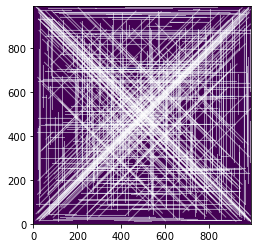

* 21101


In [97]:
# 5
src = readlines(5)
src2 = '''0,9 -> 5,9
8,0 -> 0,8
9,4 -> 3,4
2,2 -> 2,1
7,0 -> 7,4
6,4 -> 2,0
0,9 -> 2,9
3,4 -> 1,4
0,0 -> 8,8
5,5 -> 8,2'''.split('\n')

coords = list()
for line in src:
    f, t = line.split(' -> ')
    x1, y1 = map(int, f.split(','))
    x2, y2 = map(int, t.split(','))
    coords.append([x1, y1, x2, y2])
coords = np.array(coords, dtype=int)

maxes = coords.max(axis=0)
xmax, ymax = max(maxes[0], maxes[2]), max(maxes[1], maxes[3])
field = np.zeros((xmax+1, ymax+1), dtype=int)
# plt.figure(figsize=(20,20))
for line in coords:
    x1, y1, x2, y2 = line
#     plt.plot((x1,x2), (y1,y2), lw=10, c='w', alpha=0.5)
    if x1==x2:
        if y1 < y2:
            ys = range(y1, y2+1)
        else:
            ys = range(y1, y2-1, -1)
        for y in ys:
            field[x1,y] += 1
            
    if y1==y2:
        if x1 < x2:
            xs = range(x1, x2+1)
        else:
            xs = range(x1, x2-1, -1)
        for x in xs:
            field[x,y1] += 1
            
# plt.imshow(field.T, origin='lower')
# plt.show()
print('*', field[field > 1].shape[0])


field = np.zeros((xmax+1, ymax+1), dtype=int)
# plt.figure(figsize=(20,20))
for line in coords:
    x1, y1, x2, y2 = line
    plt.plot((x1,x2), (y1,y2), lw=1, c='w', alpha=0.5)
    if x1!=x2 and y1!=y2:
        if x1 < x2:
            xs = range(x1, x2+1)
        else:
            xs = range(x1, x2-1, -1)
            
        if y1 < y2:
            ys = range(y1, y2+1)
        else:
            ys = range(y1, y2-1, -1)
            
        for x,y in zip(xs, ys):
            field[x,y] += 1
    
    if x1==x2:
        if y1 < y2:
            ys = range(y1, y2+1)
        else:
            ys = range(y1, y2-1, -1)
        for y in ys:
            field[x1,y] += 1
            
    if y1==y2:
        if x1 < x2:
            xs = range(x1, x2+1)
        else:
            xs = range(x1, x2-1, -1)
        for x in xs:
            field[x,y1] += 1
            
plt.imshow(field.T, origin='lower')
plt.show()
print('*', field[field > 1].shape[0])

In [45]:
# 6
src = readlines(6)[0]
src2 = '3,4,3,1,2'
src = list(map(int, src.split(',')))

def sol_6(src, days):
    fishes = {k:src.count(k) for k in range(0,9)}
    for i in range(days):
        f2 = {k:0 for k in range(0,9)}
        for i in range(1,9):
            f2[i-1] = fishes[i]
        f2[6] += fishes[0]
        f2[8] += fishes[0]
        fishes = f2
    return sum(fishes.values())

print('*', sol_6(src, 80))
print('*', sol_6(src, 256))

* 374927
* 1687617803407


In [147]:
# 7
src = np.fromstring(readlines(7)[0], dtype=int, sep=',')
src2 = np.fromstring('16,1,2,0,4,2,7,1,2,14', dtype=int, sep=',')

mn, mx = src.min(), src.max()
distances = np.empty(mx-mn+1, dtype=int)
for i in range(mn, mx+1):
    distances[i] = sum(abs(src - i))
print('*', distances.min())

def tri(n):
    return n * (n+1) / 2

fuel_costs = [sum(tri(abs(src - i))) for i in range(mn, mx+1)]
print('*', int(min(fuel_costs)))

* 323647
* 87640209


In [68]:
# 8
src = readlines(8)
src2 = '''\
be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe
edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc
fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg
fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb
aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea
fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb
dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe
bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef
egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb
gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce'''.split('\n')
src3 = ['acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab | cdfeb fcadb cdfeb cdbaf']

numbers, readings = [], []
for line in src:
    parts = line.split(' | ')
    numbers.append(parts[0].split())
    readings.append(parts[1].split())

lens = [len(item) for sublist in readings for item in sublist]
print('*', lens.count(2) + lens.count(3) + lens.count(4) + lens.count(7))


very_final_sum = 0
for n,r in zip(numbers,readings):
    cn = dict() # correct numbers
    cn[1] = set([x for x in n if len(x) == 2][0])
    cn[7] = set([x for x in n if len(x) == 3][0])
    cn[4] = set([x for x in n if len(x) == 4][0])
    cn[8] = set([x for x in n if len(x) == 7][0])
    for nn in n:
        nn = set(nn)
        if len(nn) == 6:
            if len(nn & cn[4]) == 4 and nn not in cn.values():
                cn[9] = nn
            
            if len(nn & cn[1]) == 2 and nn not in cn.values():
                cn[0] = nn
            
            if len(nn & cn[1]) == 1 and nn not in cn.values():
                cn[6] = nn
                
        if len(nn) == 5:
            if len(nn & cn[1]) == 2 and nn not in cn.values():
                cn[3] = nn
                
            if len(nn & cn[4]) == 3 and nn not in cn.values():
                cn[5] = nn
                
            if len(nn & cn[4]) == 2 and nn not in cn.values():
                cn[2] = nn
    values = {''.join(sorted(list(v))):k for k,v in cn.items()}
    readings = [''.join(sorted(x)) for x in r]
    
    final_sum = 0
    final_sum += 1000 * values[readings[0]]
    final_sum += 100 * values[readings[1]]
    final_sum += 10 * values[readings[2]]
    final_sum += values[readings[3]]
#     print(final_sum)
    
    very_final_sum += final_sum
    
print('*', very_final_sum)

* 530
* 1051087


* 514


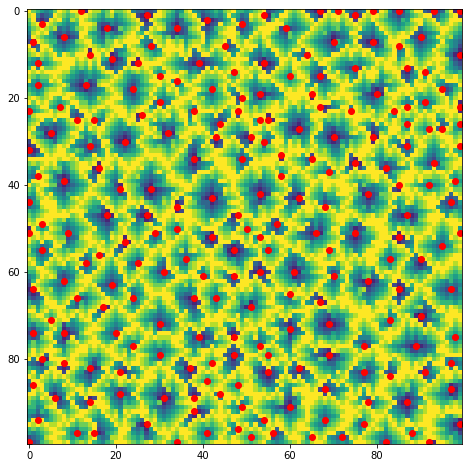

* 1103130


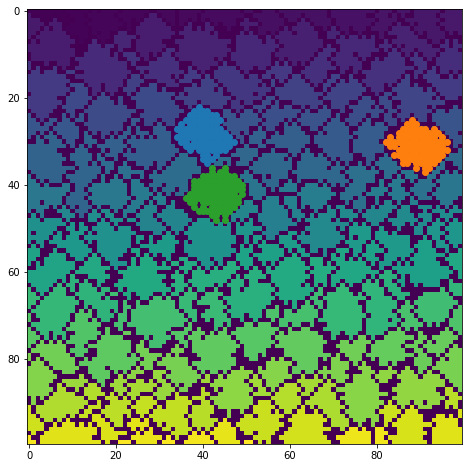

In [95]:
# 9
src = readlines(9)
src2 = '''2199943210
3987894921
9856789892
8767896789
9899965678'''.split('\n')
src = np.array([list(map(int, x.strip())) for x in src], dtype=int)

padded = np.pad(src, ((1,1),(1,1)), constant_values=10)
p1 = np.roll(padded, 1, axis=0)
p2 = np.roll(padded, -1, axis=0)
p3 = np.roll(padded, 1, axis=1)
p4 = np.roll(padded, -1, axis=1)
cake = np.stack((padded+1, p1, p2, p3, p4))
minindex = np.argmin(cake, axis=0)
center = minindex[1:-1,1:-1]
lowest_values = src[center == 0]
indices = np.where(center == 0)
lowest_sum_risk = lowest_values.sum() + lowest_values.shape[0]

print('*', lowest_sum_risk)
plt.figure(figsize=(8,8))
plt.imshow(src.T, vmin=0, vmax=9)
plt.scatter(*indices, c='r')
plt.show()

from scipy.ndimage import label

src[src != 9] = 1
src[src == 9] = 0

labeled_array, num_features = label(src)
sizes = [[x, np.where(labeled_array == x)[0].shape[0]] for x in range(1, num_features+1)]
biggest = np.array(sorted(sizes, key=lambda x:x[1])[-3:])

print('*', np.product(biggest[:,1]))
plt.figure(figsize=(8,8))
plt.imshow(labeled_array)
for i in biggest[:,0]:
    ind = np.where(labeled_array == i)
    plt.scatter(ind[1], ind[0])
plt.show()

In [31]:
# 10
src = '''[({(<(())[]>[[{[]{<()<>>
[(()[<>])]({[<{<<[]>>(
{([(<{}[<>[]}>{[]{[(<()>
(((({<>}<{<{<>}{[]{[]{}
[[<[([]))<([[{}[[()]]]
[{[{({}]{}}([{[{{{}}([]
{<[[]]>}<{[{[{[]{()[[[]
[<(<(<(<{}))><([]([]()
<{([([[(<>()){}]>(<<{{
<{([{{}}[<[[[<>{}]]]>[]]'''.split('\n')
src = readlines(10)

costs = {'(':3, '[':57, '{':1197, '<':25137}
pairs = {'(':')', '[':']', '{':'}', '<':'>'}
pairs_inv = {v:k for k,v in pairs.items()}
errors = list()
incomplete = list()
for line in src:
#     print(line.count('('), line.count('['), line.count('{'), line.count('<'), line.count(')'), line.count(']'), line.count('}'), line.count('>'))
    
    pars = list()
    put_into_inc = True
    for c in line:
        if c in '([{<':
            pars.append(c)
            
        else:
            if pars[-1] == pairs_inv[c]:
                pars.pop(-1)
            else:
                errors.append(pairs_inv[c])
                put_into_inc = False
                break
                
    if put_into_inc:
        incomplete.append(pars[::-1])
score = sum(costs[c] for c in errors)
print('*', score)

costs = {'(':1, '[':2, '{':3, '<':4}
scores = list()
for inc in incomplete:
    score = 0
    for c in inc:
        score *= 5
        score += costs[c]
    scores.append(score)
    
scores.sort()
median = scores[int(len(scores) / 2 - 0.5)]
print('*', median)

* 299793
* 3654963618


* 1615
* 249
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


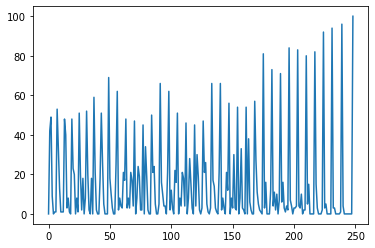

In [138]:
# 11
src = '''5483143223
2745854711
5264556173
6141336146
6357385478
4167524645
2176841721
6882881134
4846848554
5283751526'''.split('\n')
# src = '''11111
# 19991
# 19191
# 19991
# 11111'''.split('\n')
src = readlines(11)

src = np.array([list(line) for line in src], dtype=int)

from itertools import product

src = np.pad(src, ((1,1),(1,1)), constant_values=0)
flashes_cnt = 0
step = 0

border_mask = np.zeros_like(src)
border_mask[1:-1,1:-1] = 1

flashes_per_step = list()
while True:
    step += 1
#     print(src[1:-1,1:-1])
    src += 1
    
    flashes = np.zeros_like(src)
    while True:
        tens = np.argwhere((src >= 10) & (flashes == 0))        
        if tens.shape[0] == 0:
            break
        
        charge = np.zeros_like(src)
        for x,y in tens:
            charge[x-1:x+2,y-1:y+2] += 1
            src[x,y] = 0
            flashes[x,y] = 1
            
        src += charge
            
#         print('src\n', src)
#         print('charge\n', charge)
#         print('flashes\n', flashes)
    src *= (1 - flashes)
    src *= border_mask
    
    totalflashes = flashes.sum()
    flashes_cnt += totalflashes
    if step == 100:
        print('*', flashes_cnt)
        
    flashes_per_step.append(totalflashes)
    
    if totalflashes == 100:
        print('*', step)
        break
    
#     print(step+1, '-'*15)
            
print(src[1:-1,1:-1])

plt.plot(flashes_per_step)

[('x', 655), ('y', 447), ('x', 327), ('y', 223), ('x', 163), ('y', 111), ('x', 81), ('y', 55), ('x', 40), ('y', 27), ('y', 13), ('y', 6)]
1311 895
* 684


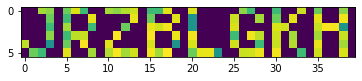

* 98


In [220]:
# 13
src = '''6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0
fold along y=7
fold along x=5'''.split('\n')
src = readlines(13)

coords = [s for s in src if not 'fold' in s]
f = [s for s in src if 'fold' in s]

for i,v in enumerate(coords):
    x,y = map(int, v.split(','))
    coords[i] = (x, y)
    
coords = np.array(coords, dtype=int)
    
folds = list()
for line in f:
    d, v = line.split('=')
    folds.append((d[-1], int(v)))
print(folds)

xmax = 2 * max(x[1] for x in folds if x[0] == 'x') + 1
ymax = 2 * max(x[1] for x in folds if x[0] == 'y') + 1
print(xmax, ymax)
    
# xmax, ymax = coords.max(axis = 0)
sheet = np.zeros((xmax, ymax), dtype=int)
for c in coords:
    sheet[c[0], c[1]] = 1

# plt.imshow(sheet.T)
# plt.show()

for i,fold in enumerate(folds):
    d, c = fold
    
    if d == 'y':
        new_sheet = np.zeros((sheet.shape[0], sheet.shape[1] // 2), dtype=int)
#         print(new_sheet.shape)
        new_sheet += sheet[:,:sheet.shape[1] // 2]
        new_sheet += sheet[:,:sheet.shape[1] // 2:-1]
        sheet = new_sheet
        
    if d == 'x':
        new_sheet = np.zeros((sheet.shape[0] // 2, sheet.shape[1]), dtype=int)
#         print(new_sheet.shape)
        new_sheet += sheet[:sheet.shape[0] // 2   ,:]
        new_sheet += sheet[:sheet.shape[0] // 2:-1,:]
        sheet = new_sheet
        
    if i == 0:
        print('*', np.count_nonzero(sheet))
        
        
plt.imshow((sheet / (sheet+1)).T)
plt.show()
print('*', np.count_nonzero(sheet))

In [52]:
# 14
src = '''NNCB
CH -> B
HH -> N
CB -> H
NH -> C
HB -> C
HC -> B
HN -> C
NN -> C
BH -> H
NC -> B
NB -> B
BN -> B
BB -> N
BC -> B
CC -> N
CN -> C'''.split('\n')
src = readlines(14)

template = src[0]

subs = dict()
for line in src[1:]:
    pair, letter = line.split(' -> ')
    subs[pair] = [pair[0] + letter, letter + pair[1]]
    
allletters = set(''.join(src[1:]))
allletters.discard(' ')
allletters.discard('>')
allletters.discard('-')

allpairs = [''.join(x) for x in itertools.product(allletters, repeat=2)]

pairs = [x+y for x,y in zip(template[:-1], template[1:])] 
dpairs = {k:0 for k in allpairs}
for p in pairs:
    dpairs[p] += 1

for steps in [10, 40]:
    for _ in range(steps):
        dpairs2 = {k:0 for k in allpairs}
        for k in dpairs.keys():
            dpairs2[subs[k][0]] += dpairs[k]
            dpairs2[subs[k][1]] += dpairs[k]
        dpairs = dpairs2
    #     print({k:v for k,v in dpairs.items() if v})

    counts = dict()
    for k in dpairs.keys():
        counts[k[0]] = counts.setdefault(k[0], 0) + dpairs[k]
    counts[src[0][-1]] += 1
    print('*', max(counts.values()) - min(counts.values()))

* 2797
* 2997031483513096


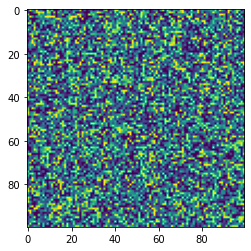

In [10]:
# 15
src = readlines(15)

src = np.array([list(x) for x in src], dtype=int)

plt.imshow(src)

* 4656
* 1908


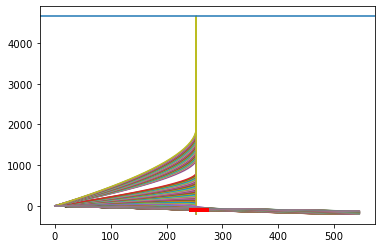

In [87]:
# 17
src = ((20, 30), (-10, -5))
src = ((241, 273), (-97, -63))

((x1, x2), (y1, y2)) = src

from matplotlib.patches import Rectangle
rect = Rectangle((x1, y1), x2-x1, y2-y1, linewidth=3, edgecolor='r', facecolor='none', zorder=200)

def get_path(vx, vy, y1=y1):
    x = y = 0
    points = [[0,0]]
    
    while y >= y1:
        x += vx
        y += vy
        points.append([x, y])
        
        if y < y1:
            break
        
        vy -= 1
        vx = vx - 1 if vx > 0 else vx
        
    return np.array(points, dtype=int).T

vx_min = math.floor(0.5 * ((8 * x1 + 1)**0.5 - 1))
vx_max = x2 + 1

vy_min = y1 - 1
vy_max = -y1 + 1


def gets_into_trench(path, coords):
    ((x1, x2), (y1, y2)) = coords
    for p in path.T:
        if x1 <= p[0] <= x2 and y1 <= p[1] <= y2:
            return True
    return False

max_y = 0
hit_count = 0
for vx in range(vx_min, vx_max+1):
    for vy in range(vy_min, vy_max+1):
        path = get_path(vx, vy)
        if gets_into_trench(path, src):
#             print(vx, vy)
            plt.plot(*path)
            max_y = max(max_y, path[1].max())
            hit_count += 1
            
plt.gca().add_patch(rect)
plt.axhline(max_y)
# plt.xlim(x1-5, x2+5)
# plt.ylim(y1-5, y2+5)


print('*', max_y)
print('*', hit_count)